In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# cv2 computer vision library for loading images
import cv2
# tensorflow for Convolutional Neural Network (CNN)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [4]:
df = pd.read_csv('./master_df')

In [5]:
df.head()

,name,category,avg_red,avg_green,avg_blue,avg_bw,max_av_col_bw,min_avg_col_bw,max_avg_row_bw,min_avg_row_bw
0,eJ5fbY23rZWUULxO.png,0,55.7003,136.1176,70.6581,106.8905,142.77,80.11,141.06,88.76
1,TLbqMqwDrww8CS0p.png,0,74.5444,166.3031,103.1938,136.4751,151.17,111.01,156.11,126.70
2,9kYPKMVtd4nOvSK4.png,0,49.8590,136.0174,74.8508,107.4184,142.60,74.68,138.07,65.80
3,N3pHY9fO1y0jdeVu.png,0,63.2338,132.6059,77.6126,107.7741,130.01,86.51,137.99,90.07
4,JXD8WyY4cQoEyvtU.png,0,78.5174,154.9004,81.2245,123.7117,136.29,111.00,139.74,108.65


In [7]:
df.describe()

,category,avg_red,avg_green,avg_blue,avg_bw,max_av_col_bw,min_avg_col_bw,max_avg_row_bw,min_avg_row_bw
count,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000
mean,1.010969,66.559750,140.275591,82.583831,114.144575,144.335772,90.799246,135.699068,91.379721
std,0.821448,14.069843,11.189489,13.107461,10.140908,14.135544,12.199509,12.572177,15.041690
min,0.000000,20.931500,93.226700,42.416300,69.947100,96.700000,37.410000,99.000000,32.080000
25%,0.000000,58.521600,133.617800,73.968425,108.020950,135.560000,83.285000,127.612500,83.627500
50%,1.000000,65.759900,136.694600,80.262200,111.034000,143.115000,88.485000,133.205000,91.995000
75%,2.000000,74.660800,143.863675,88.754750,117.882850,152.195000,95.940000,141.355000,97.345000
max,2.000000,120.238100,183.346900,153.711500,160.141700,210.590000,136.040000,196.740000,136.400000


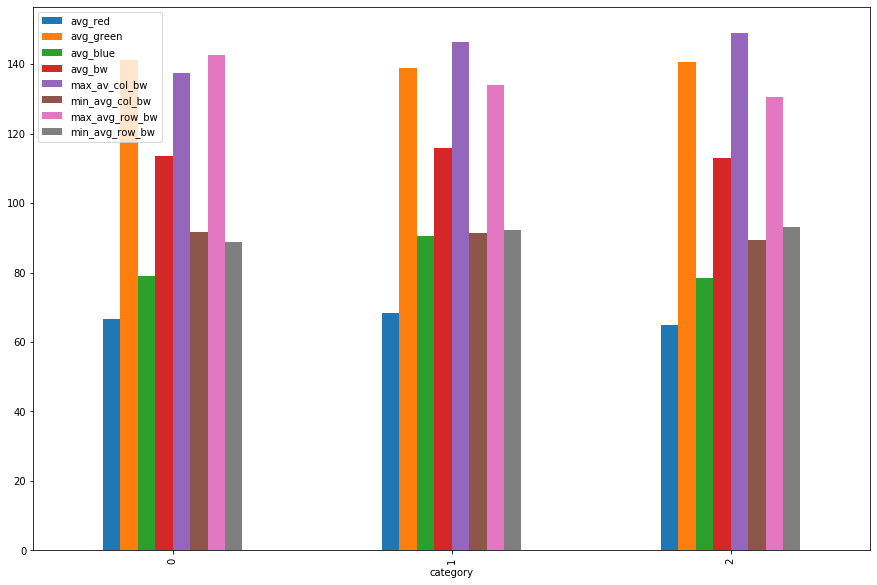

In [9]:
df.groupby('category').mean().plot(kind='bar', figsize=(15,10))

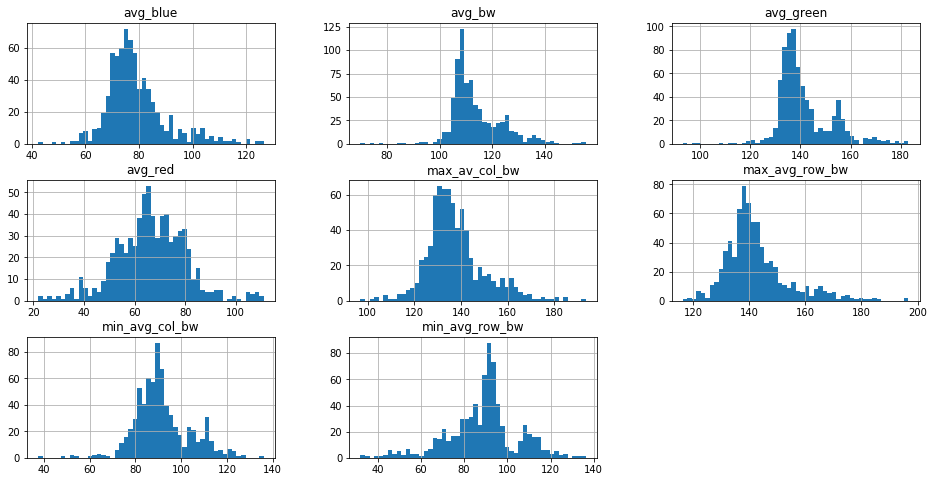

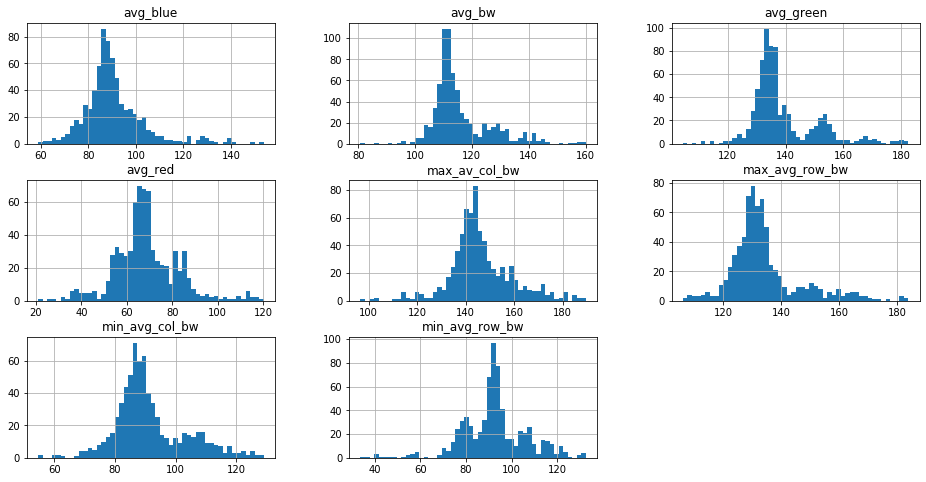

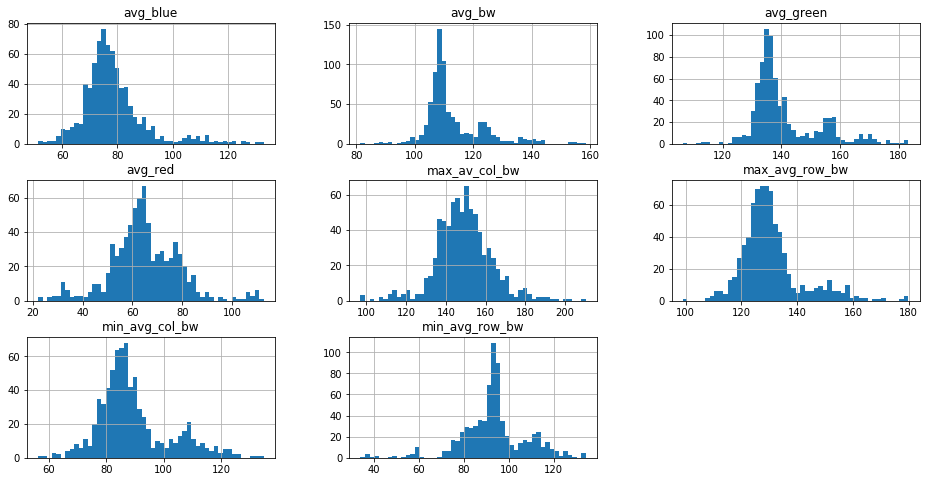

In [11]:
df.groupby('category').hist(figsize=(16,8), bins=50);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5c87e1590>,
      dtype=object)

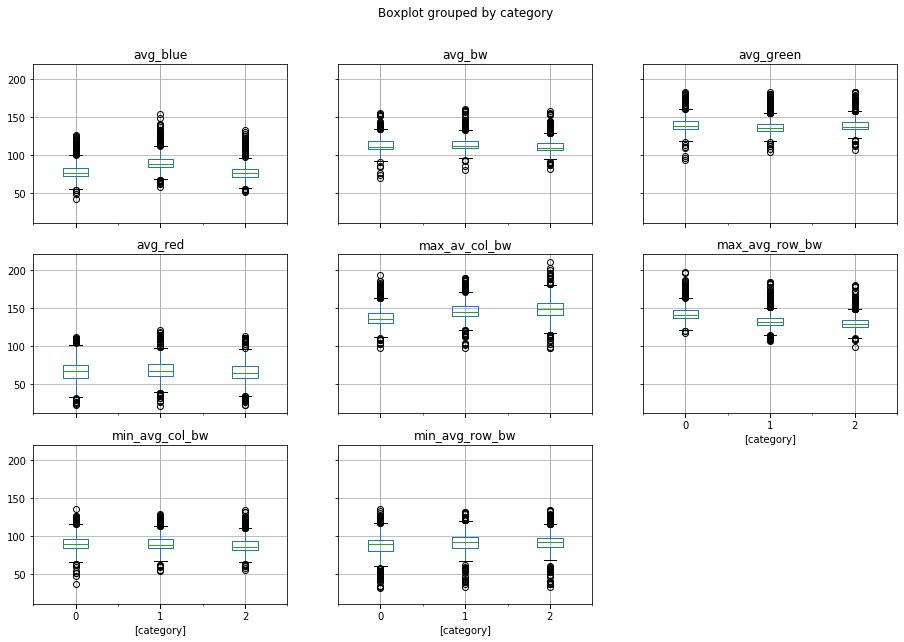

In [15]:
df.boxplot(by='category', figsize=(15,10))

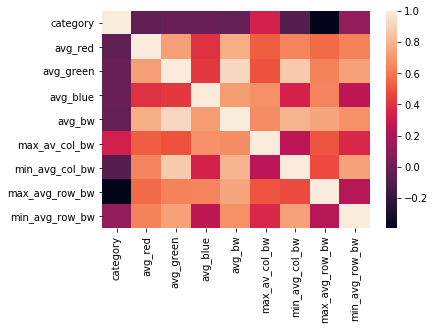

In [16]:
correlations = df.corr();
sns.heatmap(correlations);

In [20]:
df.dtypes

name               object
category            int64
avg_red           float64
avg_green         float64
avg_blue          float64
avg_bw            float64
max_av_col_bw     float64
min_avg_col_bw    float64
max_avg_row_bw    float64
min_avg_row_bw    float64
dtype: object

In [32]:
# based on correlation matrix and above bar charts, trying avg_blue, max_avg_col_bw and max_avg_row_bw
feature_columns = ['avg_blue', 'max_av_col_bw', 'max_avg_row_bw']
X = df[feature_columns]
y = df['category']

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_pred = y_pred.round()

In [51]:
metrics.accuracy_score(y_test, y_pred)

0.6288848263254113

In [77]:
# K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [78]:
metrics.accuracy_score(y_test, y_pred)

0.8720292504570384

In [72]:
# Fit a logistic regression model and store the class predictions.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/home/openoeuvre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
metrics.accuracy_score(y_test, y_pred)

0.850091407678245